In [12]:
# First, we import the libaries
import quforge.quforge as qf

In [42]:
device = 'cpu'

dim = 3 #dimension of the qudit
wires = 2 #number of qudits

In [43]:
# Define oracle
def oracle(circuit, marker): 
    state = qf.State(marker, dim=dim, device=device)
    target_state = state @ state.conj().T

    U = qf.eye(dim**wires, device=device) - 2 * target_state
    circuit.U(matrix=U, index=[0,1])

# Define the Grover diffusion step
def grover_diffusion(circuit, state): 
    U = 2 * state @ state.conj().T - qf.eye(dim**wires, device=device)
    circuit.U(matrix=U, index=[0,1])

In [44]:
# Apply Hadamard on each qudit
input_state = qf.State('0-0', 
                       dim=dim, 
                       device=device)
H = qf.H(dim=dim, 
         wires=wires, 
         index=[0,1], 
         device=device)

state = H(input_state)

# Create circuit
circuit = qf.Circuit(dim=dim, 
                     wires=wires, 
                     device=device)

# Apply the oracle, in this example, we want to find the state |22>
oracle(circuit, '2-2') 

# Apply the diffusion
grover_diffusion(circuit, state)

In [45]:
# Apply the circuit on the initial state
output = circuit(state)

# Measure the first N-1 qudits
histogram, p = qf.measure(output, 
                          index=register, 
                          dim=dim, 
                          wires=wires,
                          shots=10000
                          )

In [46]:
histogram, p = qf.measure(output, index=[0,1], dim=dim, wires=wires, shots=1024)

<BarContainer object of 9 artists>

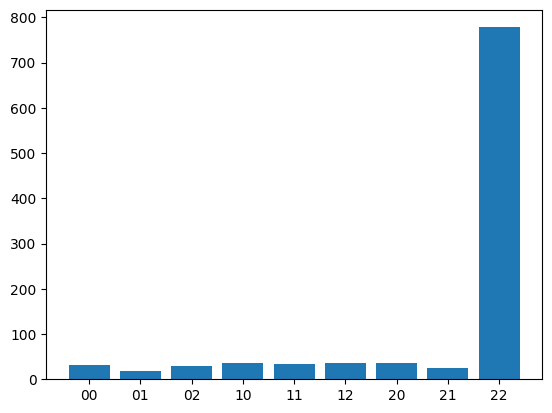

In [47]:
import matplotlib.pyplot as plt

keys = list(histogram.keys())
values = list(histogram.values())

plt.bar(keys, values)